# Retail Grocery Sales Analysis

In [1]:
library(data.table)
library(readxl)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
Data_orginal=fread("../input/supermart-grocery-sales-retail-analytics-dataset/Supermart Grocery Sales - Retail Analytics Dataset.csv"
                   , sep = ",", header= TRUE)
head(Data_orginal,5)

Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


# Preprocessing Data

In [3]:
Data_prepro1=as.data.table(Data_orginal)
str(Data_prepro1)


Classes ‘data.table’ and 'data.frame':	9994 obs. of  11 variables:
 $ Order ID     : chr  "OD1" "OD2" "OD3" "OD4" ...
 $ Customer Name: chr  "Harish" "Sudha" "Hussain" "Jackson" ...
 $ Category     : chr  "Oil & Masala" "Beverages" "Food Grains" "Fruits & Veggies" ...
 $ Sub Category : chr  "Masalas" "Health Drinks" "Atta & Flour" "Fresh Vegetables" ...
 $ City         : chr  "Vellore" "Krishnagiri" "Perambalur" "Dharmapuri" ...
 $ Order Date   : chr  "11-08-2017" "11-08-2017" "06-12-2017" "10-11-2016" ...
 $ Region       : chr  "North" "South" "West" "South" ...
 $ Sales        : int  1254 749 2360 896 2355 2305 826 1847 791 1795 ...
 $ Discount     : num  0.12 0.18 0.21 0.25 0.26 0.26 0.33 0.32 0.23 0.27 ...
 $ Profit       : num  401.3 149.8 165.2 89.6 918.5 ...
 $ State        : chr  "Tamil Nadu" "Tamil Nadu" "Tamil Nadu" "Tamil Nadu" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
min(Data_prepro1$`Order Date`)
max(Data_prepro1$`Order Date`)

#head(sort(unique(Data_prepro1$`Order Date`)),100)
head(Data_prepro1[grepl('-', Data_prepro1$`Order Date`)==TRUE],10)
head(Data_prepro1[grepl('-', Data_prepro1$`Order Date`)==FALSE],10)

[1] "01-01-2018"

[1] "9/30/2018"

Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu


Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
OD13,Sharon,Snacks,Cookies,Dindigul,4/15/2018,South,1659,0.19,315.21,Tamil Nadu
OD15,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,11/22/2016,Central,831,0.22,207.75,Tamil Nadu
OD16,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,11/22/2016,Central,1440,0.11,100.80,Tamil Nadu
OD18,Arutra,Beverages,Health Drinks,Bodi,5/13/2015,West,1617,0.19,113.19,Tamil Nadu
OD19,Haseena,"Eggs, Meat & Fish",Mutton,Tenkasi,8/27/2015,West,1757,0.35,386.54,Tamil Nadu
OD20,Verma,Beverages,Soft Drinks,Kanyakumari,8/27/2015,West,692,0.29,159.16,Tamil Nadu
OD21,Hafiz,Beverages,Health Drinks,Vellore,8/27/2015,West,522,0.19,208.80,Tamil Nadu
OD24,Alan,Fruits & Veggies,Organic Vegetables,Tenkasi,7/16/2018,East,969,0.29,77.52,Tamil Nadu
OD25,Sharon,"Eggs, Meat & Fish",Eggs,Ooty,9/25/2016,West,1100,0.11,495.00,Tamil Nadu


*** Editing Date format**

In [5]:
Data_prepro1$`Order_Date`=Data_prepro1$`Order Date`
Data_prepro1$`Order_Date`=as.Date(Data_prepro1$`Order_Date`)
Data_prepro1[grepl('-', Data_prepro1$`Order Date`)==TRUE]$`Order_Date`= 
as.Date(strptime(as.character(Data_prepro1[grepl('-', Data_prepro1$`Order Date`)==TRUE]$`Order Date`), "%d-%m-%Y"))
Data_prepro1[grepl('/', Data_prepro1$`Order Date`)==TRUE]$`Order_Date`=
as.Date(strptime(as.character(Data_prepro1[grepl('/', Data_prepro1$`Order Date`)==TRUE]$`Order Date`), "%m/%d/%Y"))

min(Data_prepro1$`Order_Date`)
max(Data_prepro1$`Order_Date`)

Data_prepro1$`Order Date`=NULL
head(Data_prepro1,5)

[1] "2015-01-02"

[1] "2018-12-30"

Order ID,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,State,Order_Date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<date>
OD1,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,2017-08-11
OD2,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,2017-08-11
OD3,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,2017-12-06
OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,2016-11-10
OD5,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,2016-11-10


*** Renaming columns**

In [6]:
names(Data_prepro1)[names(Data_prepro1)=='Order ID']="Order_ID"
names(Data_prepro1)[names(Data_prepro1)=='Customer Name']="Customer_Name"
names(Data_prepro1)[names(Data_prepro1)=='Sub Category']="Sub_Category"
names(Data_prepro1)

[1] "Order_ID"      "Customer_Name" "Category"      "Sub_Category" 
 [5] "City"          "Region"        "Sales"         "Discount"     
 [9] "Profit"        "State"         "Order_Date"

*** Counting dupilcate row**

In [7]:
nrow(Data_prepro1[duplicated(Data_prepro1),])

[1] 0

* **Counting Orders Per Year**

In [8]:
Data_prepro1$Year=substr(Data_prepro1$`Order_Date`,1,4)
Orders_PerYear=Data_prepro1[, .(Count_Orders = length(Order_ID)), by = list(Year)]
Orders_PerYear=Orders_PerYear[order(Orders_PerYear$Year)]
Orders_PerYear


Year,Count_Orders
<chr>,<int>
2015,1993
2016,2102
2017,2587
2018,3312


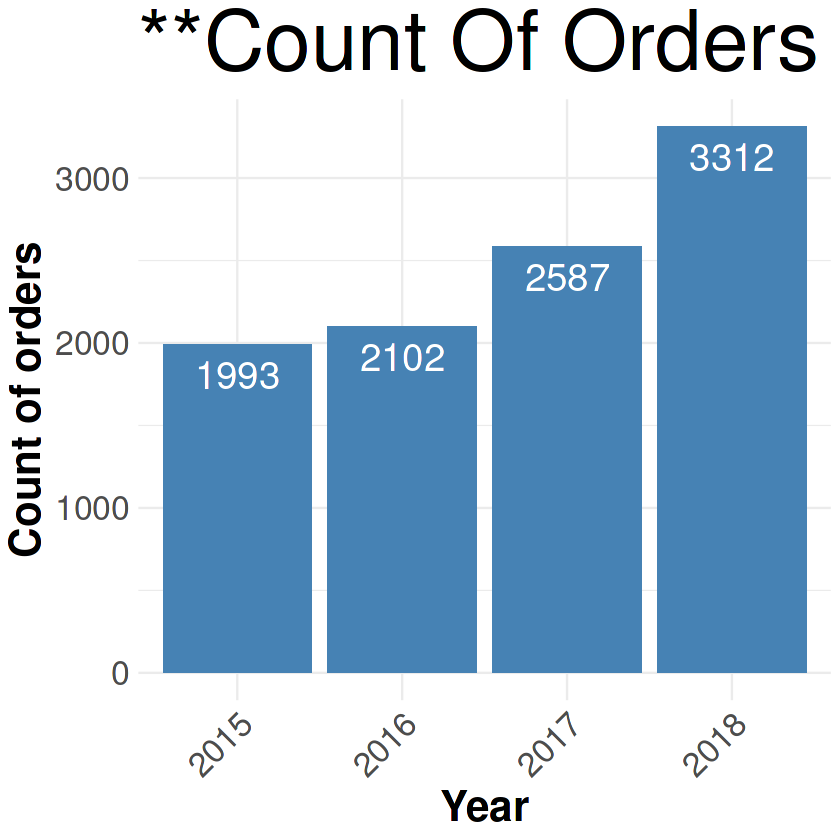

In [9]:
ggplot(data=Orders_PerYear, aes(x=Year, y=Count_Orders)) +
  geom_bar(stat="identity", fill="steelblue")+
  geom_text(aes(label=Count_Orders), vjust=1.6, color="white", size=8)+
 theme_minimal() +
labs(
    title = "**Count Of Orders Per Year**",
    x = "Year",
    y = "Count of orders"
  ) +
theme(axis.text=element_text(size=20),
        axis.title=element_text(size=25,face="bold")) +
theme(axis.text.x = element_text(angle = 45 , hjust = 1),
     plot.title = element_text(size=50))


**Counting Orders Per Year-Month**

In [10]:
Data_prepro1$Year_Month=substr(Data_prepro1$`Order_Date`,1,7)
Orders_PerYearMonth=Data_prepro1[, .(Count_Orders = length(Order_ID)), by = list(Year_Month)]
Orders_PerYearMonth=Orders_PerYearMonth[order(Orders_PerYearMonth$Year_Month)]
head(Orders_PerYearMonth,5)

Year_Month,Count_Orders
<chr>,<int>
2015-01,131
2015-02,86
2015-03,168
2015-04,121
2015-05,148


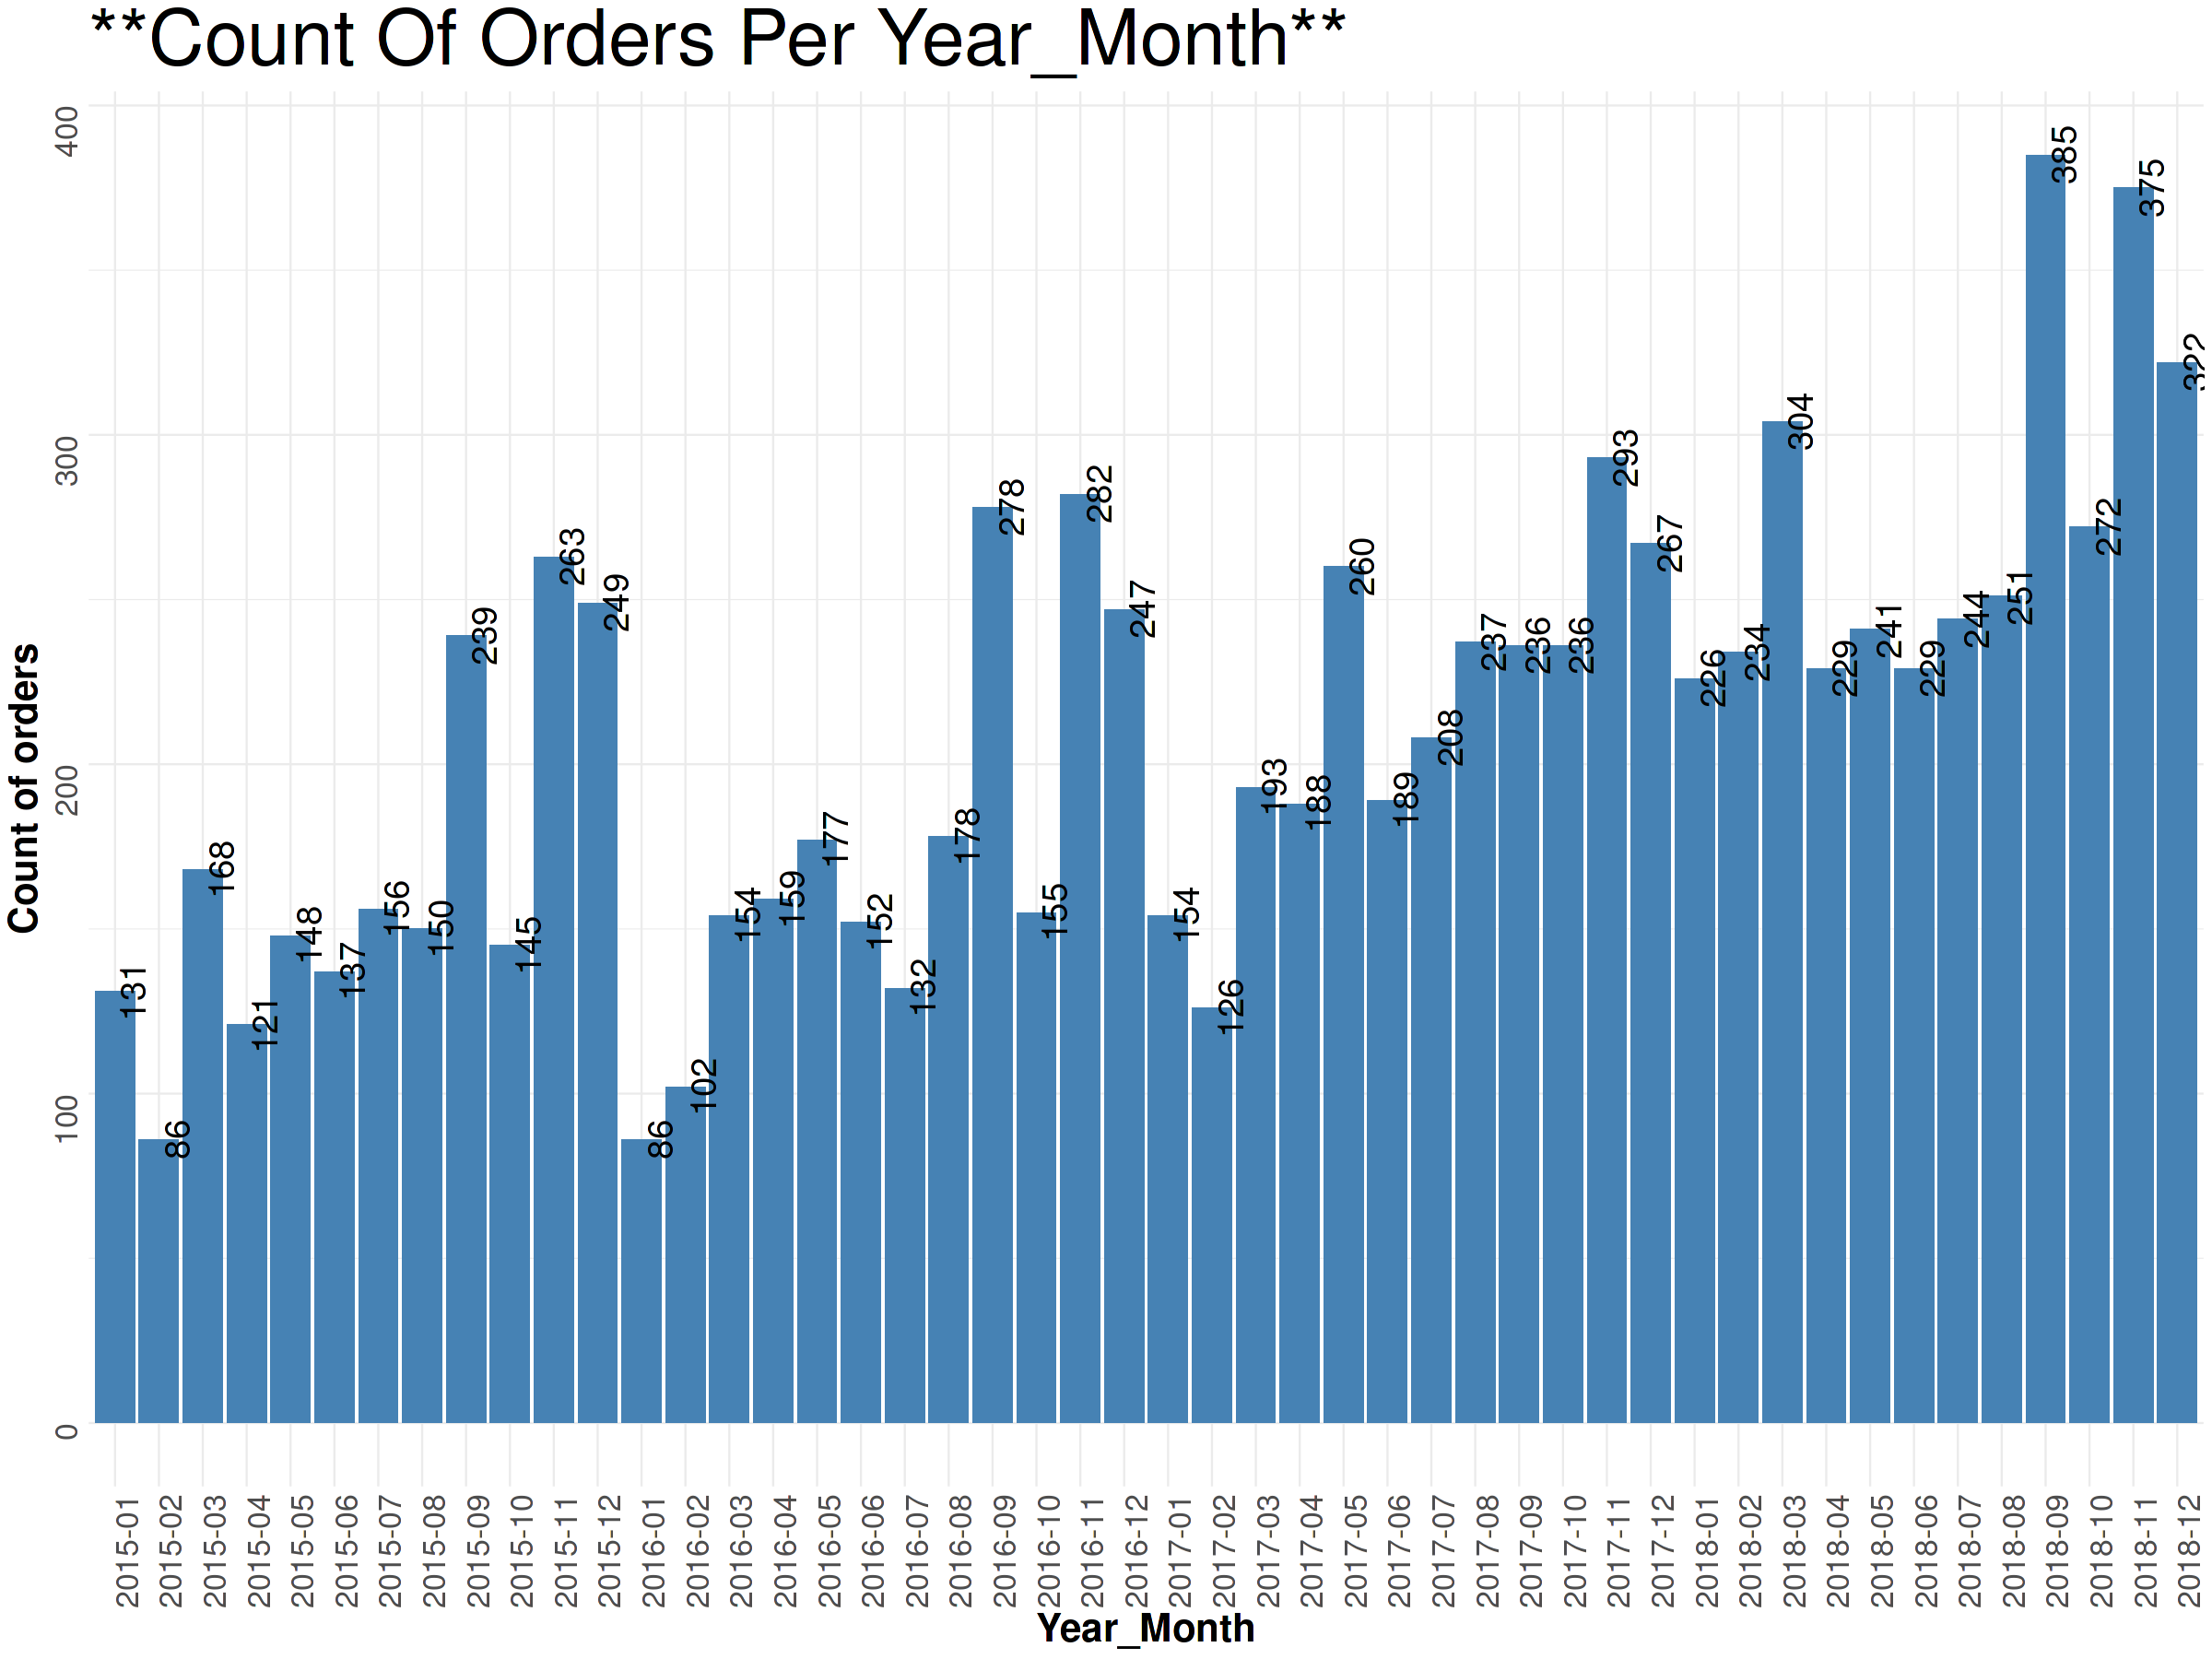

In [11]:
options(repr.plot.width = 20, repr.plot.height =15)

ggplot(data=Orders_PerYearMonth, aes(x=Year_Month, y=Count_Orders)) +
  geom_bar(stat="identity", fill="steelblue")+
  geom_text(aes(label=Count_Orders), vjust=1.2, color="Black", size=8, angle = 90)+
 theme_minimal() +
labs(
    title = "**Count Of Orders Per Year_Month**",
    x = "Year_Month",
    y = "Count of orders"
  ) +
theme(axis.text=element_text(size=20, angle = 90),
        axis.title=element_text(size=25,face="bold")) +
theme(axis.text.x = element_text(angle = 90 , hjust = 1),
     plot.title = element_text(size=50))

* Insert Column Month Name

In [12]:
Orders_PerYearMonth_Name=as.data.table(Orders_PerYearMonth)
Orders_PerYearMonth_Name$Year=as.numeric(substr(Orders_PerYearMonth_Name$Year_Month,1,4))
Orders_PerYearMonth_Name$Month=as.numeric(substr(Orders_PerYearMonth_Name$Year_Month,6,7))
Orders_PerYearMonth_Name$Month_Name=month.abb[as.numeric(Orders_PerYearMonth_Name$Month)]
head(Orders_PerYearMonth_Name,5)

Year_Month,Count_Orders,Year,Month,Month_Name
<chr>,<int>,<dbl>,<dbl>,<chr>
2015-01,131,2015,1,Jan
2015-02,86,2015,2,Feb
2015-03,168,2015,3,Mar
2015-04,121,2015,4,Apr
2015-05,148,2015,5,May


* Plot By Category Month

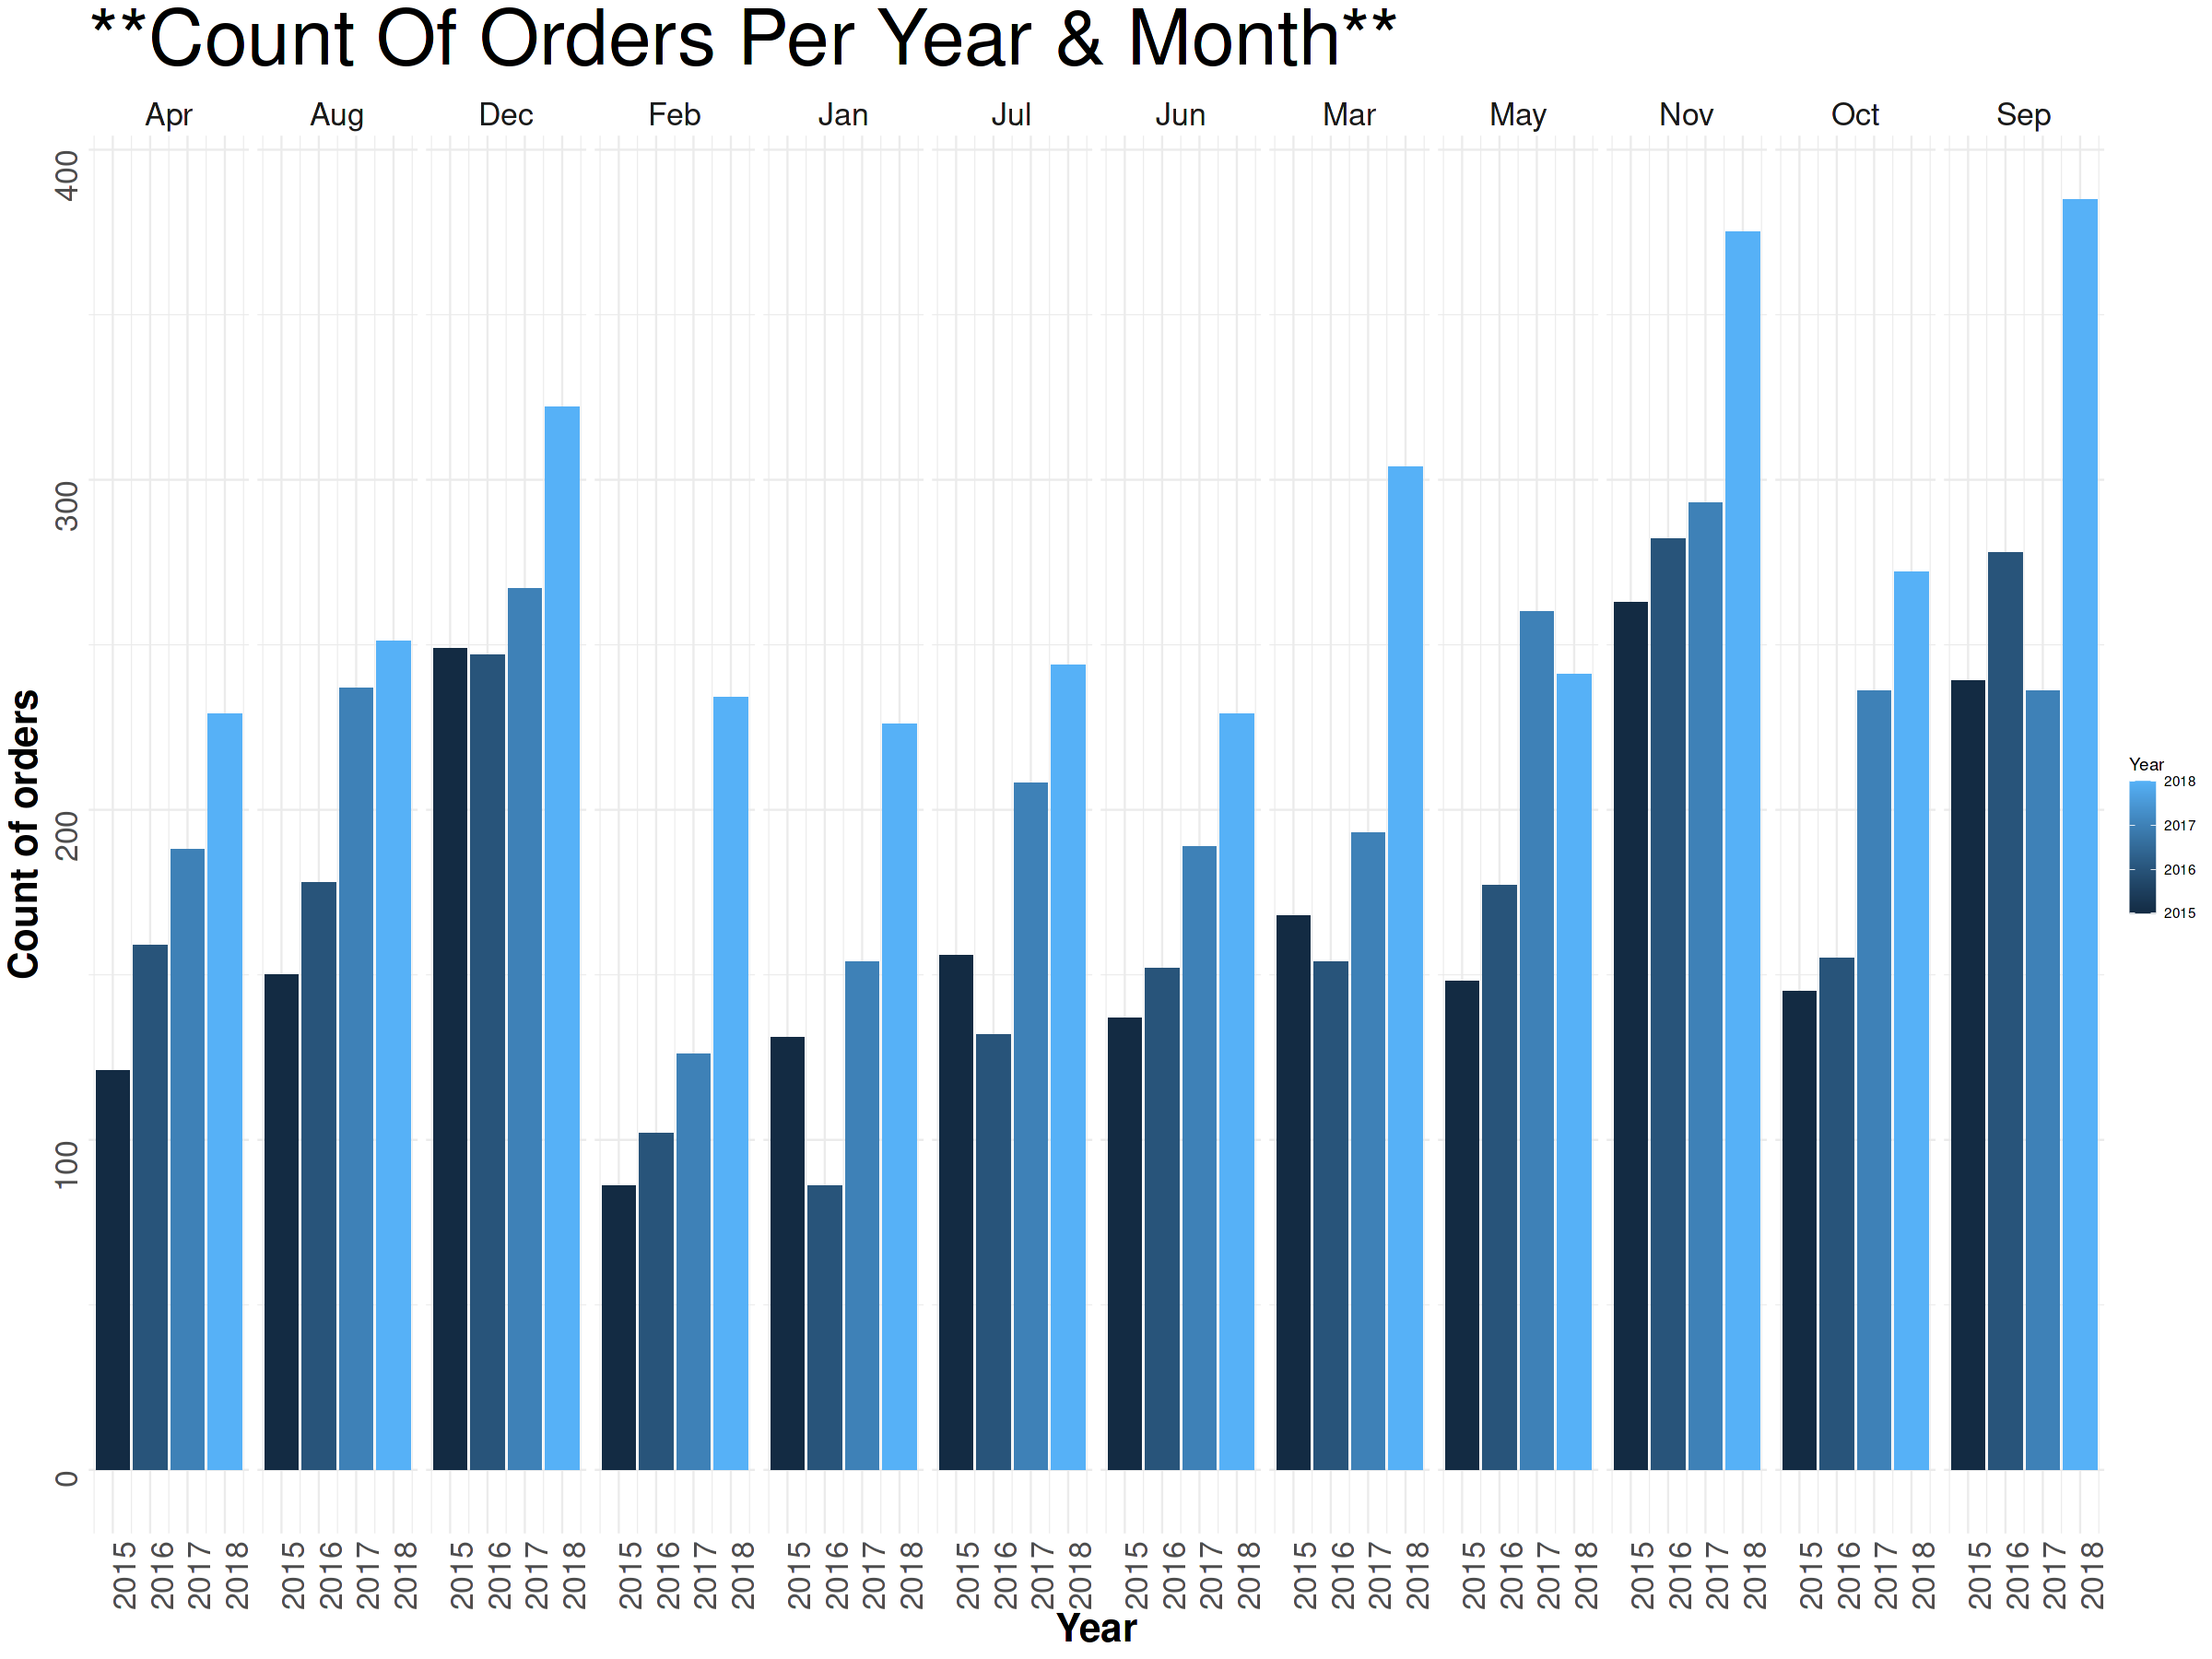

In [13]:
ggplot(Orders_PerYearMonth_Name) +
 geom_bar(aes(x = Year, y = Count_Orders, fill = Year), position = "stack", stat = "identity") +
facet_grid(~Month_Name) +
 theme_minimal() +
labs(
    title = "**Count Of Orders Per Year & Month**",
    x = "Year",
    y = "Count of orders"
  ) +
theme(axis.text=element_text(size=20, angle = 90),
        axis.title=element_text(size=25,face="bold")) +
theme(axis.text.x = element_text(angle = 90 , hjust = 1 , size=20),
     plot.title = element_text(size=50),
     strip.text = element_text(size = 20)) 


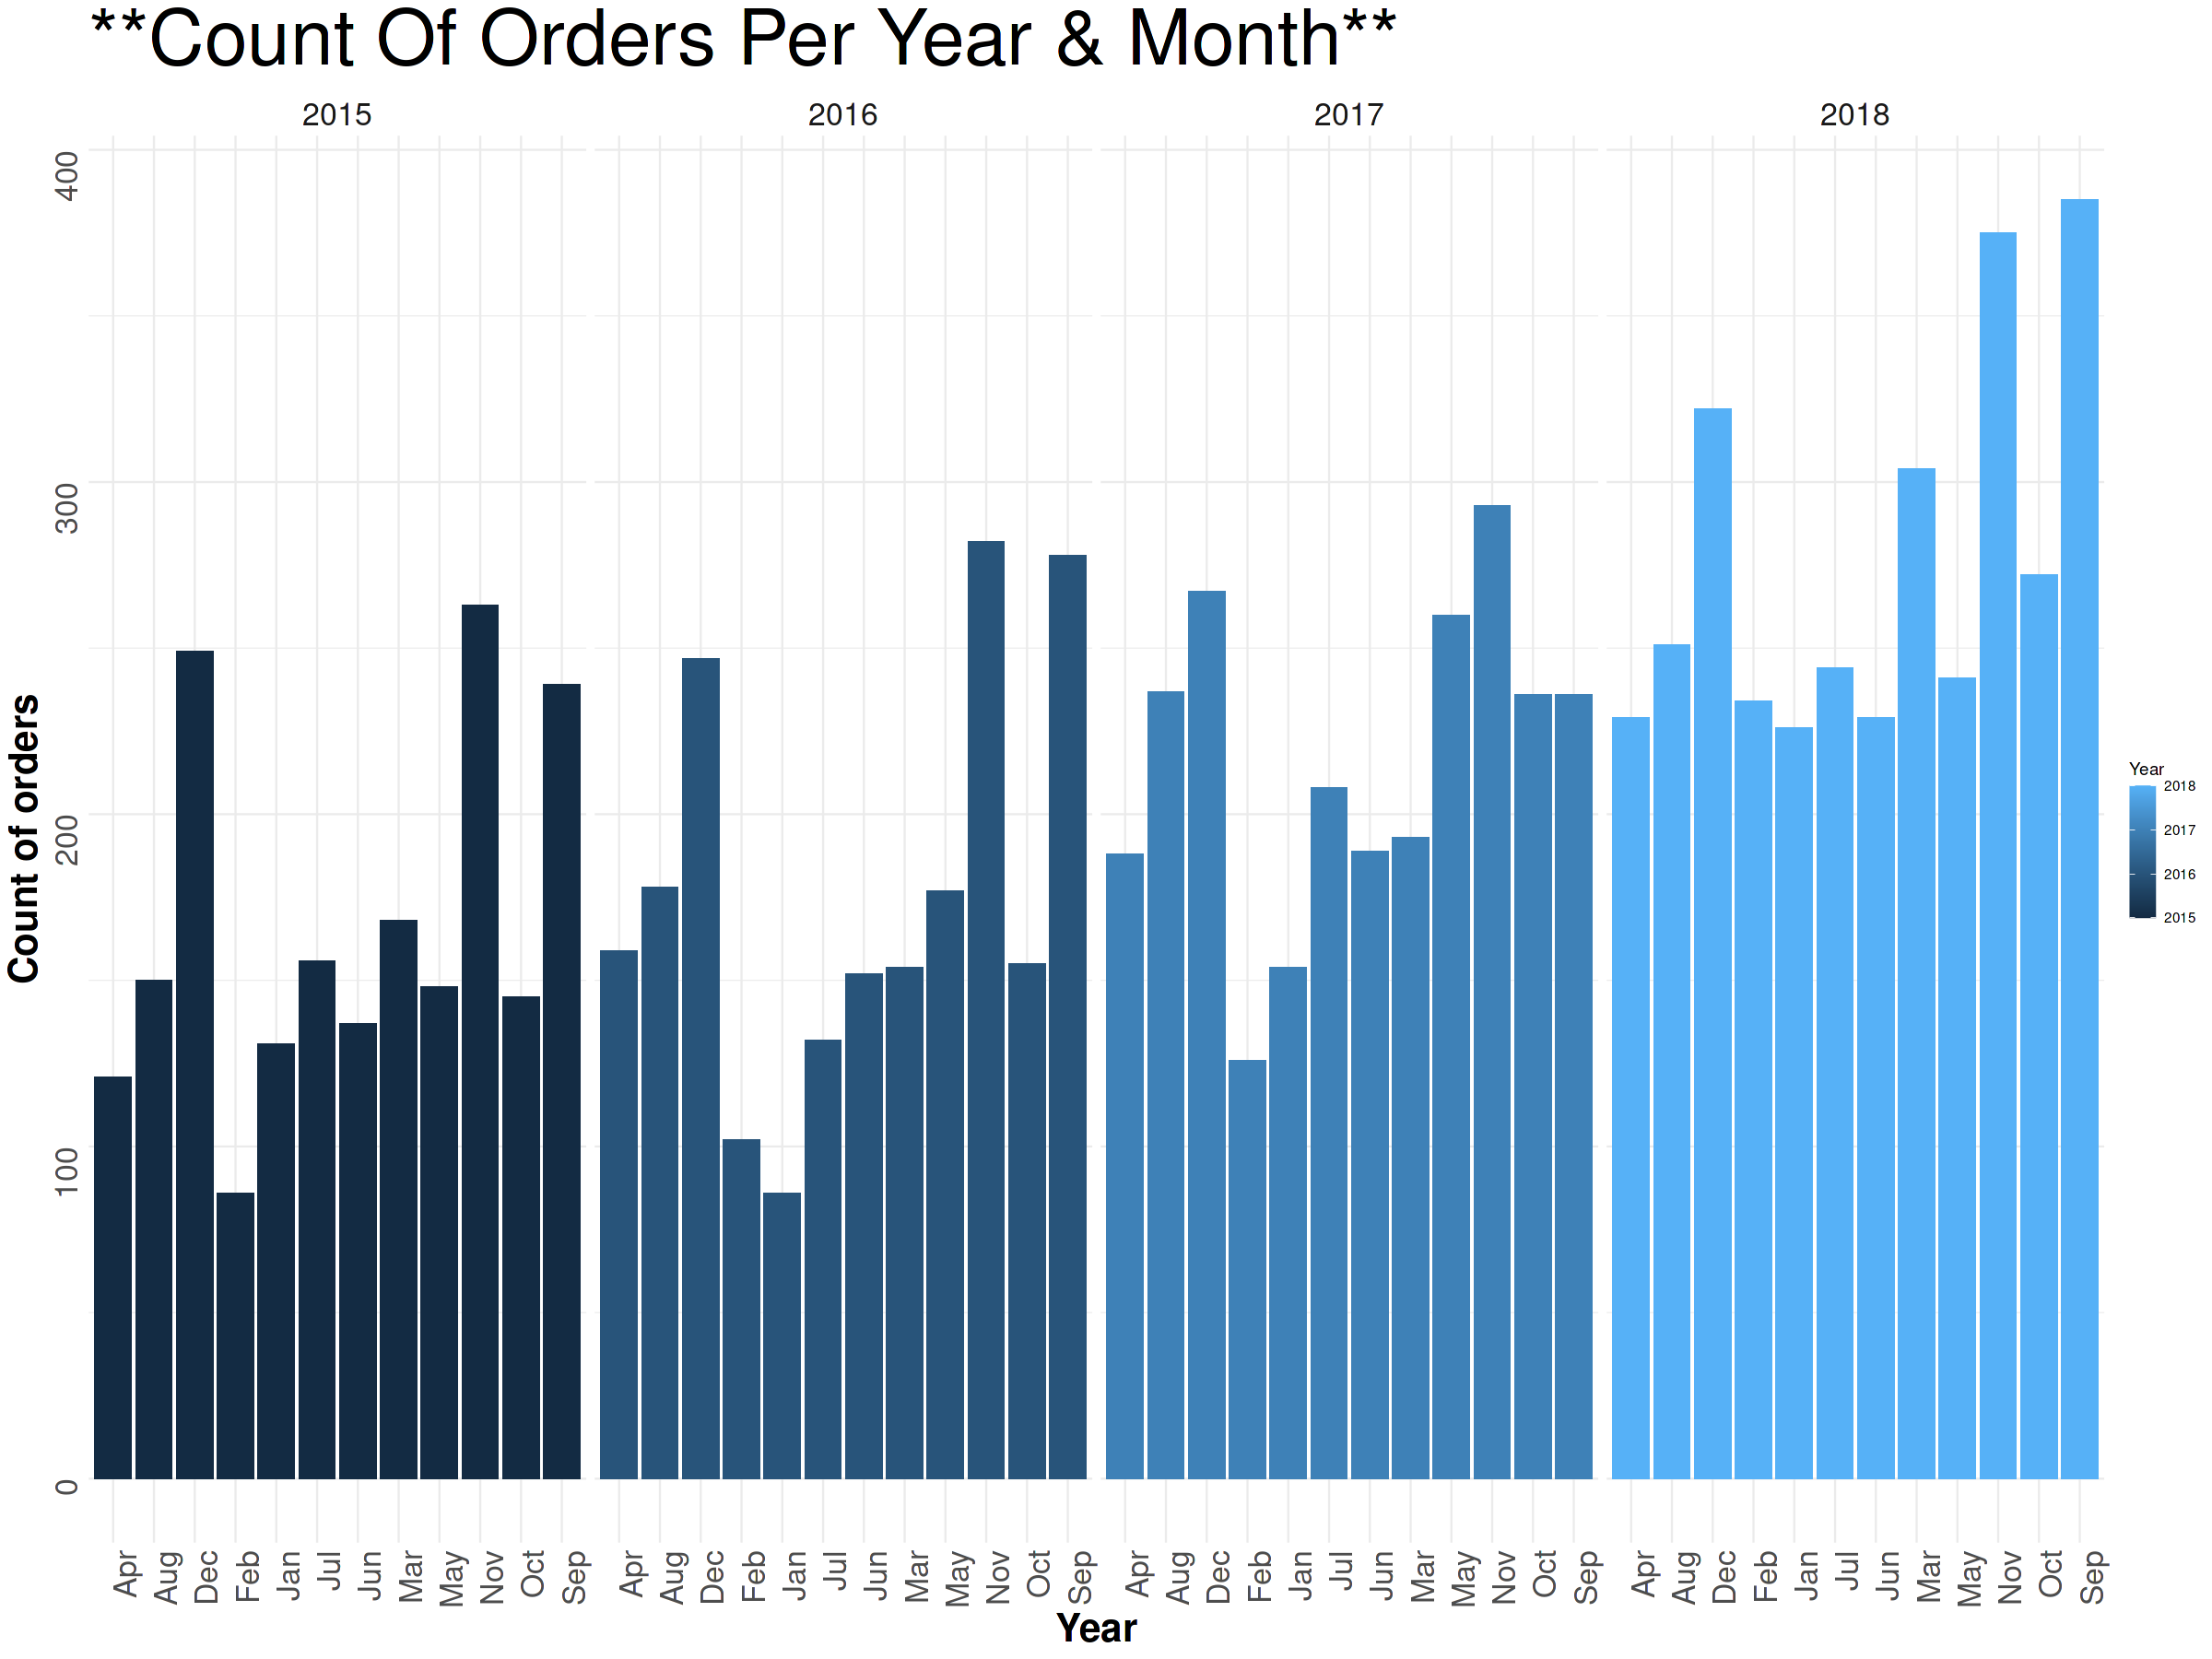

In [14]:
ggplot(Orders_PerYearMonth_Name) +
 geom_bar(aes(x = Month_Name, y = Count_Orders, fill =Year ), position = "stack", stat = "identity") +
facet_grid(~Year) +
 theme_minimal() +
labs(
    title = "**Count Of Orders Per Year & Month**",
    x = "Year",
    y = "Count of orders"
  ) +
theme(axis.text=element_text(size=20, angle = 90),
        axis.title=element_text(size=25,face="bold")) +
theme(axis.text.x = element_text(angle = 90 , hjust = 1 , size=20),
     plot.title = element_text(size=50),
     strip.text = element_text(size = 20)) 